# Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading saved data after preprocessing it

In [14]:
eda_data = pd.read_csv('../data/interim/eda_df.csv',delimiter=',')
eda_data.head()

,CUSTOMER_ID,COLLEGE,DATA,INCOME,OVERCHARGE,LEFTOVER,HOUSE,LESSTHAN600k,CHILD,JOB_CLASS,REVENUE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,TIME_CLIENT,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURNED
0,C100000,zero,660.000000,19995.0,0,0,897338.0,False,4,3,160.0,155,1,1.2,15,very_unsat,little,considering,STAY
1,C100001,one,317.647059,31477.0,155,15,393396.0,True,0,1,100.0,245,27,2.7,4,unsat,little,considering,LEAVE
2,C100006,zero,208.695652,66742.0,0,13,937197.0,False,4,2,127.0,493,20,2.6,4,avg,very_little,considering,STAY
3,C100008,zero,265.017668,40864.0,183,0,986430.0,False,3,3,86.0,390,13,2.5,12,unsat,very_high,considering,LEAVE
4,C100010,one,440.000000,43321.5,200,0,394622.0,True,2,3,77.0,175,18,2.4,10,very_unsat,little,actively_looking_into_it,LEAVE



## Data Viz Distributions.


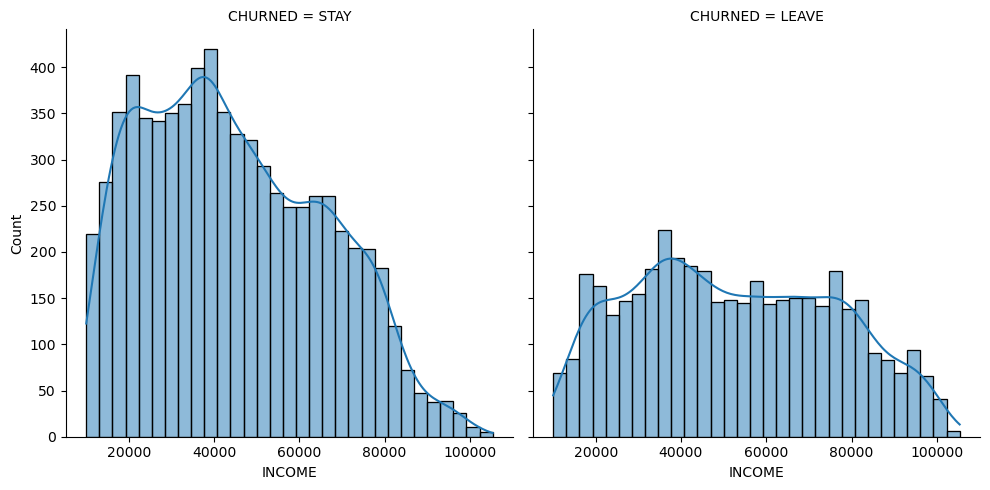

In [15]:
sns.displot(data=eda_data, x="INCOME", col="CHURNED", kde=True)
plt.show()

Data is not following normal distribution

In [48]:
# indentifying the categorical variables
cat_var= eda_data.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['CUSTOMER_ID', 'COLLEGE', 'REPORTED_SATISFACTION',
       'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN', 'CHURNED'],
      dtype='object')


### Cat Features Dist Study

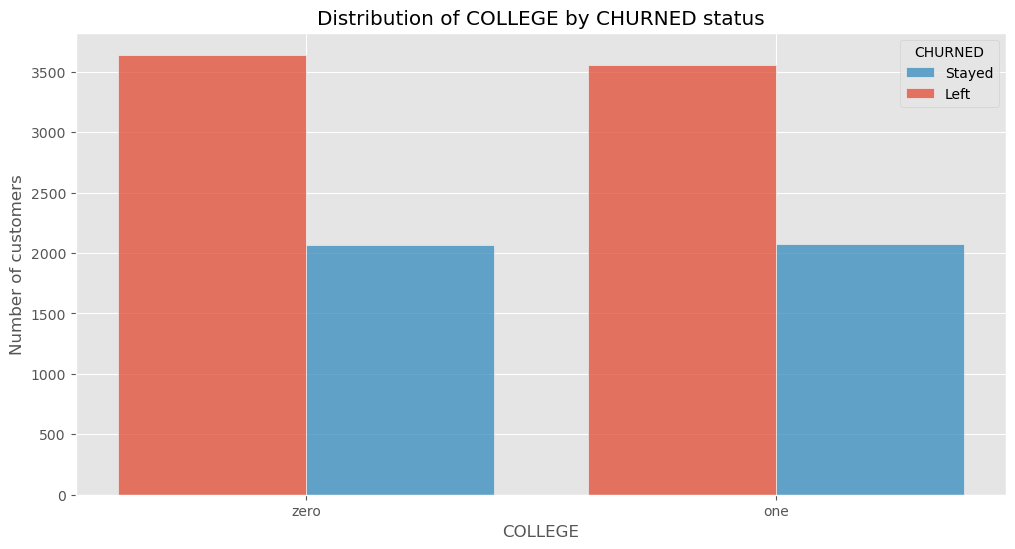

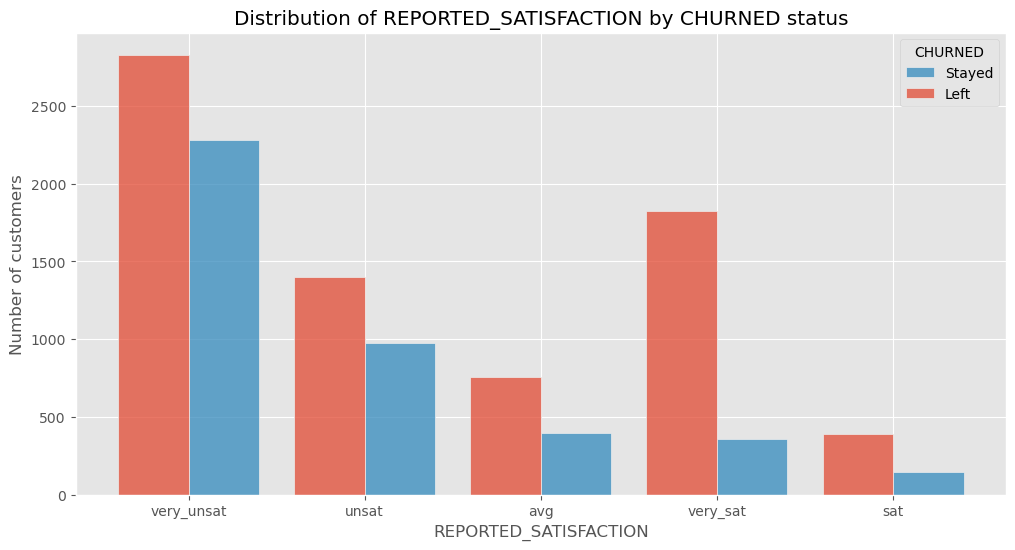

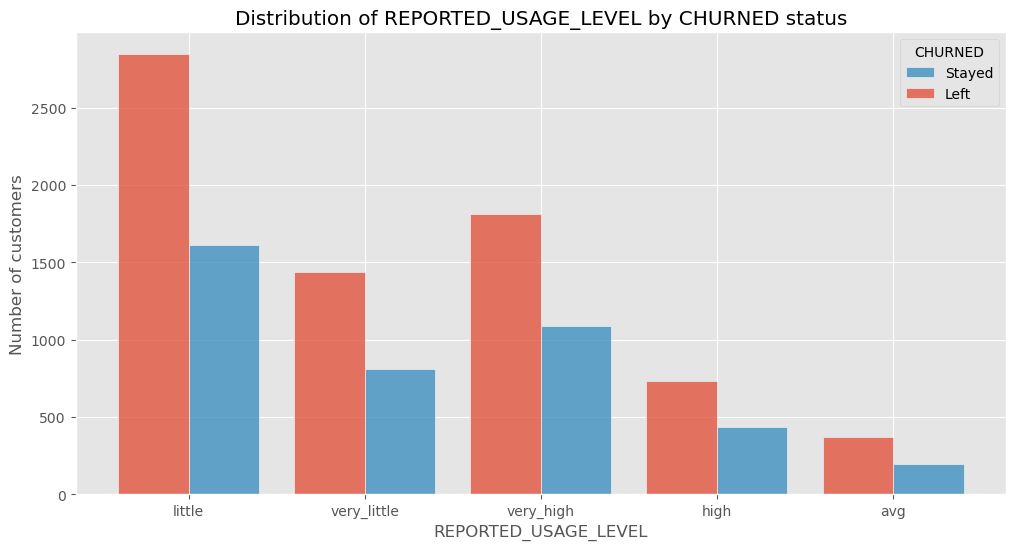

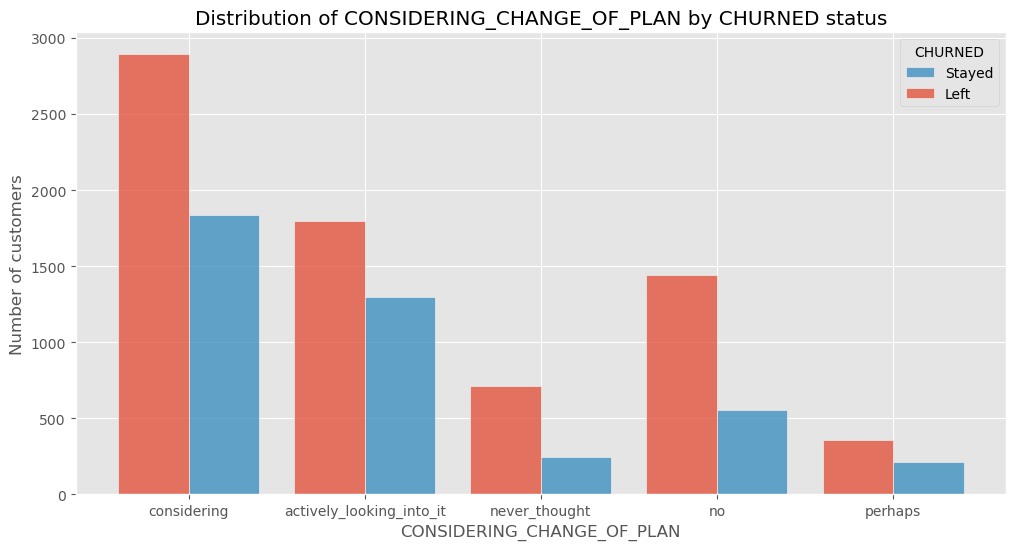

In [52]:
cat_var = ['COLLEGE', 'REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']
for column in cat_var:
    plt.figure(figsize=(12, 6))
    
    # Plot for customers who stayed (CHURNED = 0) and left (CHURNED = 1)
    sns.histplot(data=eda_data, x=column, hue='CHURNED', multiple='dodge', shrink=.8)
    
    plt.xlabel(column)
    plt.ylabel("Number of customers")
    plt.title(f"Distribution of {column} by CHURNED status")
    plt.legend(title='CHURNED', labels=['Stayed', 'Left'])
    plt.show()

### Num Features Dist

In [59]:
eda_data.dtypes
num_var= eda_data.select_dtypes(include= ["int", "float"]).columns
print(num_var)

Index(['DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE', 'CHILD',
       'JOB_CLASS', 'REVENUE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH',
       'TIME_CLIENT', 'AVERAGE_CALL_DURATION', 'LOG_INCOME'],
      dtype='object')


In [60]:
num_var = ['DATA', 'INCOME', 'OVERCHARGE', 'LEFTOVER', 'HOUSE', 'CHILD','REVENUE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH','TIME_CLIENT', 'AVERAGE_CALL_DURATION', 'LOG_INCOME']

harded coded the numeric features because of the job_class columns which is labeled coded categorical column

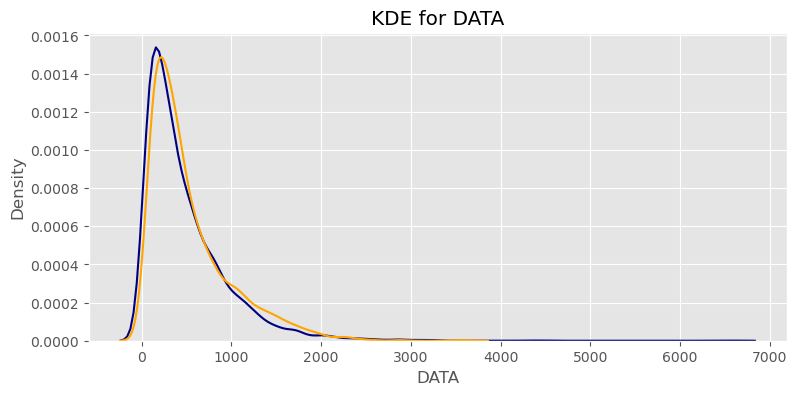

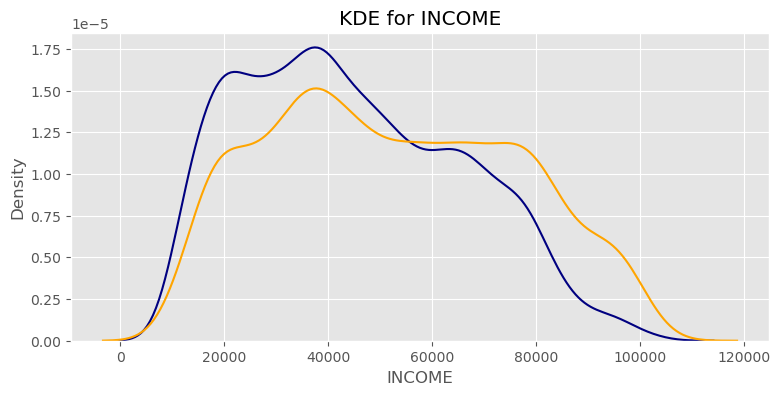

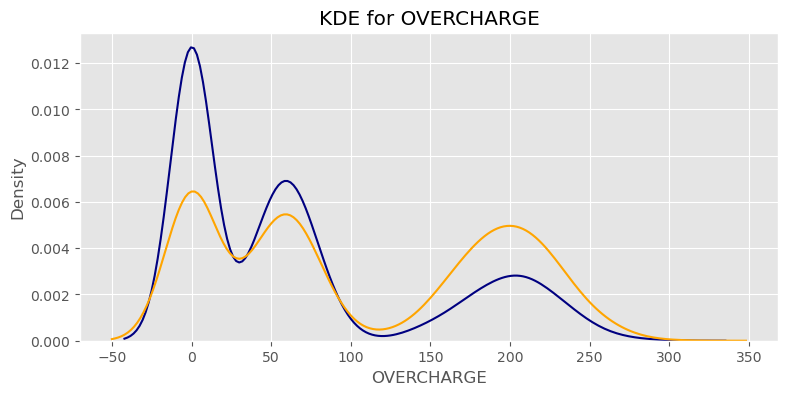

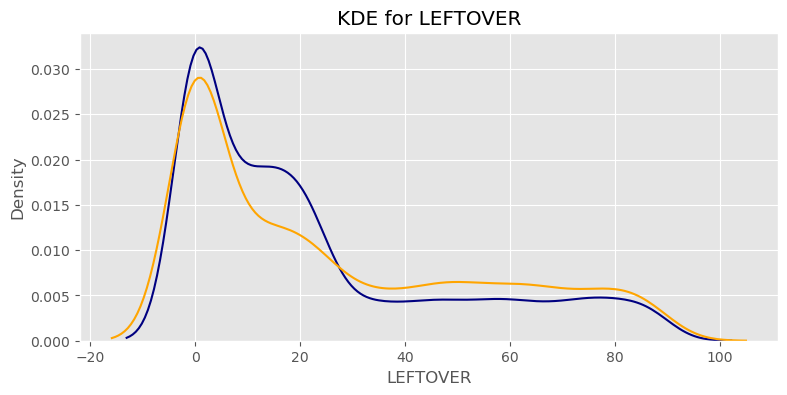

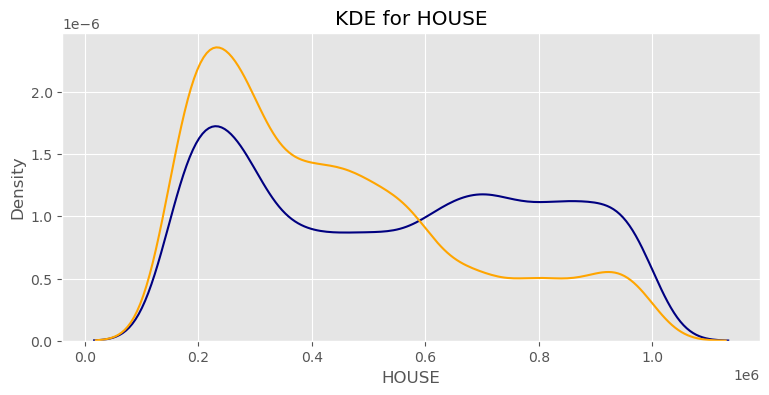

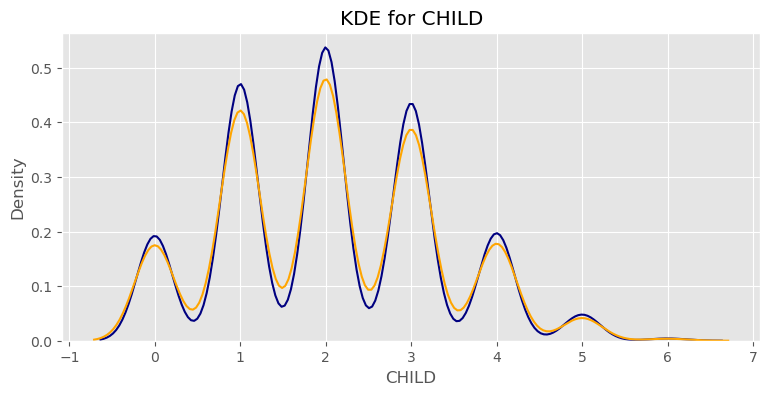

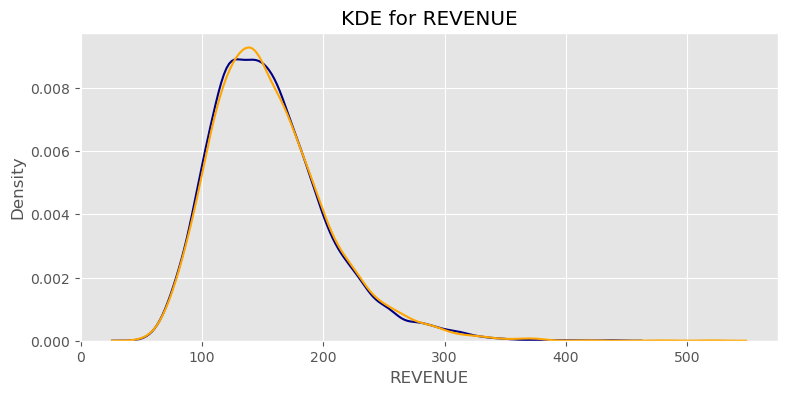

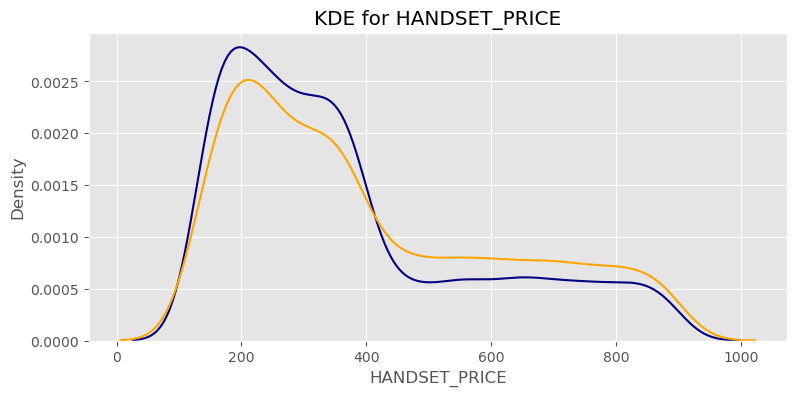

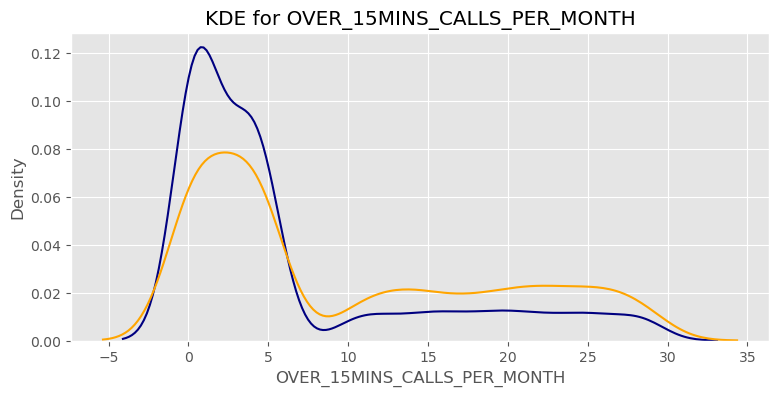

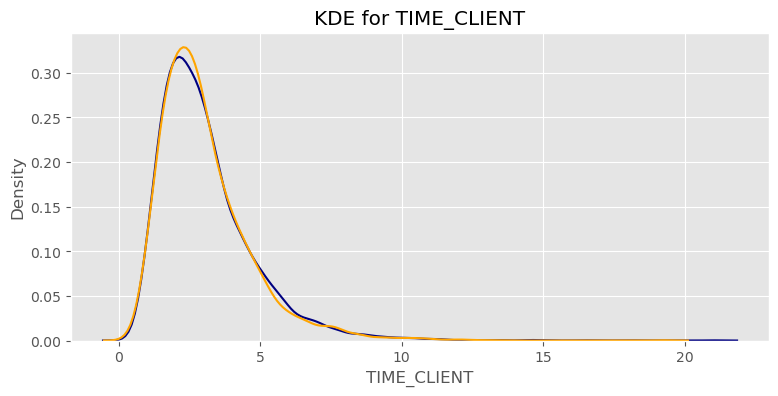

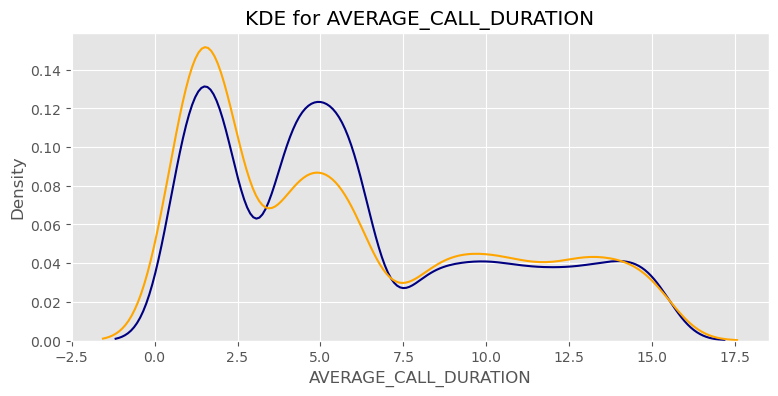

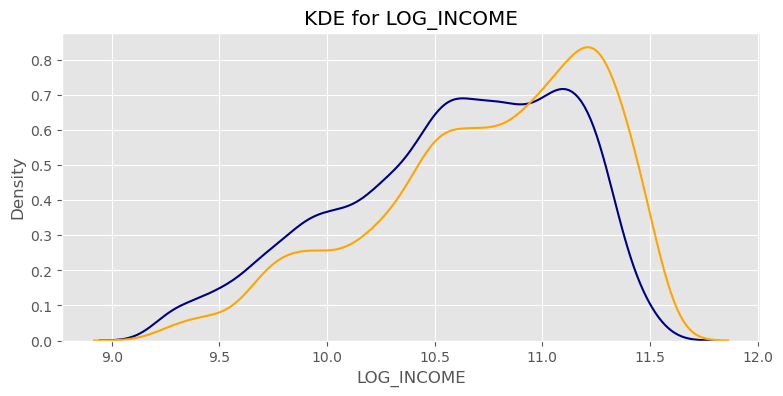

In [63]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(eda_data[eda_data['CHURNED'] == 'STAY'][feature].dropna(), color= 'navy', label= 'Churn: STAY')
    ax1 = sns.kdeplot(eda_data[eda_data['CHURNED'] == 'LEAVE'][feature].dropna(), color= 'orange', label= 'Churn: LEAVE')

for column in num_var:
    kdeplot(column)


### Feature Analysis Conclusions

**DATA**:
- The density is highest at lower values, indicating that most customers have lower data usage. The distribution has a long tail, suggesting some customers have significantly higher data usage.

**INCOME**:
- There are multiple peaks, indicating different income groups within the customer base. The density decreases as income increases.

**OVERCHARGE**:
- There are multiple peaks and some negative values. This indicates varied overcharge experiences among customers, including refunds or adjustments.

**CHILD**:
- The density has distinct peaks, indicating common family sizes among customers.

**REVENUE**:
- The density is highest at lower revenue values, suggesting most customers generate lower revenue. The distribution decreases gradually, showing a diverse range of revenue values.

**OVER_15MINS_CALLS_PER_MONTH**:
- The density is highest at low values, indicating most customers have fewer over-15-minutes calls. The distribution has multiple peaks, showing varied call durations among customers.

**AVERAGE_CALL_DURATION**:
- Bimodal distribution suggests two common call duration lengths among individuals, indicating varied usage patterns.

## Correlation Analysis: Use heatmaps to visualize correlations between features and target variable.


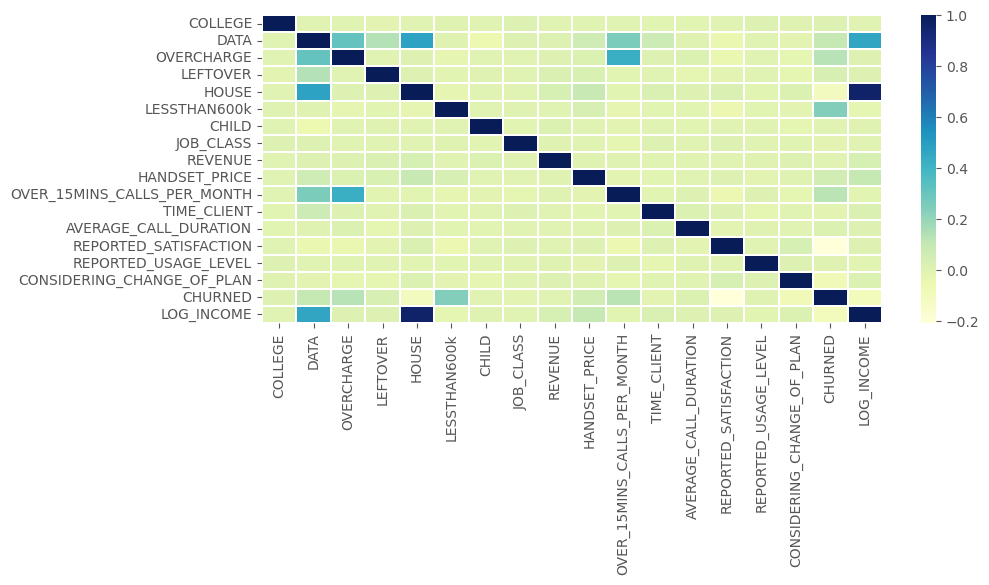

In [71]:
plt.figure(figsize=(10, 4))
eda_corr = eda_data.drop(['CUSTOMER_ID', 'INCOME'],axis=1)
corr = eda_corr.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")